In [276]:
# 1. Gather a list of highly traded stokcs and high dividend etfs
# 2. Read in text file containing list of stock names
# 3. Use YH Finance library to gather information on all the top stocks
# 4. Load information into a dataframe: Stock symbol, yearly change, stock price, dividend yield
# 5. Clean dataframe by getting rid of rows that contain null or invalid values
# 6. Get rid of stocks that have a growth of less than 15%
# 7. Calculate dividend per share column
# 8. Calculate shares owned with an investment of $1000
# 9. Caluclate quarterly dividend earnings with $1000 investment
# 10. Order dataframe from greatest to least based on quarterly dividend earnings
# 11. Graph stocks on a scatterplot showing which stocks have high dividend and high growth

In [277]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yahooFinance

stocks = []

with open("Stocks.txt") as file:
    for line in file:
        stocks.append(line.strip())

data_dict = {"Symbol": [], "FiftyTwo_Week_Percent_Change": [], "Current_Price(USD)": [], "Annual_Dividend_Yield": []}
has_symbol_val, has_change_val, has_price, has_yield = False, False, False, False

for x in range(len(stocks)):
    
    yf = yahooFinance.Ticker(stocks[x])

    try:
        data_dict["Symbol"].append(stocks[x])
        has_symbol_val = True
        data_dict["FiftyTwo_Week_Percent_Change"].append(float(100) * yf.info["52WeekChange"])
        has_change_val = True
        data_dict["Current_Price(USD)"].append(yf.info["currentPrice"])
        has_price = True
        data_dict["Annual_Dividend_Yield"].append(yf.info["dividendYield"])
        has_yield = True
        
    except KeyError:
        try:
            if not has_change_val:
                data_dict["FiftyTwo_Week_Percent_Change"].append(float(100) * yf.info["ytdReturn"])
                has_change_val = True
            if not has_price:
                data_dict["Current_Price(USD)"].append(yf.info["previousClose"])
                has_price = True
            if not has_yield:
                data_dict["Annual_Dividend_Yield"].append(yf.info["trailingAnnualDividendYield"])
                has_yield = True
            
        except KeyError:
            if not has_change_val:
                data_dict["FiftyTwo_Week_Percent_Change"].append(None)
            if not has_price:
                data_dict["Current_Price(USD)"].append(None)
            if not has_yield:
                data_dict["Annual_Dividend_Yield"].append(None)

    has_symbol_val = False
    has_change_val = False
    has_price = False
    has_yield = False
                

In [278]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame(data_dict)
df = df.drop(df[df.FiftyTwo_Week_Percent_Change < 0.15].index)
df = df.drop(df[df.Annual_Dividend_Yield == "Infinity"].index)
df = df.drop(df[df.Annual_Dividend_Yield == "Nan"].index)
df = df.dropna(how='any', axis=0)
df

,Symbol,FiftyTwo_Week_Percent_Change,Current_Price(USD),Annual_Dividend_Yield
0,MPZZF,13.390315,1.9400,0.2781
2,HZNFF,39.999998,0.1350,0.1667
3,TRMD,75.411963,38.6500,0.1439
4,EDF,12.978720,5.2200,0.1640
5,SRV,8.672428,42.8100,0.1402
7,IIF,19.395018,26.7130,0.1172
8,NHTC,21.061647,7.0240,0.1132
9,ARLP,34.522557,25.9900,0.1092
11,COHN,82.176363,9.8000,0.1030
12,YACAF,32.331908,4.6000,0.0922


In [279]:
df["Dividend_Per_Share"] = df["Current_Price(USD)"] * df["Annual_Dividend_Yield"]
df["Shares_Owned_From_ThousandDollar_Investment"] = float(1000)/df["Current_Price(USD)"]
df["Quarterly_Dividend_Earnings_From_ThousandDollar_Investment(USD)"] = df["Dividend_Per_Share"] * df["Shares_Owned_From_ThousandDollar_Investment"]
df = df.sort_values(by="Quarterly_Dividend_Earnings_From_ThousandDollar_Investment(USD)", ascending=False)
df = df.reset_index(drop=True)
df

,Symbol,FiftyTwo_Week_Percent_Change,Current_Price(USD),Annual_Dividend_Yield,Dividend_Per_Share,Shares_Owned_From_ThousandDollar_Investment,Quarterly_Dividend_Earnings_From_ThousandDollar_Investment(USD)
0,MPZZF,13.390315,1.9400,0.2781,0.539514,515.463918,278.099980
1,HZNFF,39.999998,0.1350,0.1667,0.022505,7407.407407,166.700000
2,EDF,12.978720,5.2200,0.1640,0.856080,191.570881,163.999990
3,TRMD,75.411963,38.6500,0.1439,5.561735,25.873221,143.900000
4,SRV,8.672428,42.8100,0.1402,6.001962,23.359028,140.200000
5,BBAR,52.072966,8.8501,0.1368,1.210694,112.993074,136.800000
6,ADOOY,17.169368,10.1000,0.1269,1.281690,99.009901,126.900000
7,IIF,19.395018,26.7130,0.1172,3.130764,37.434957,117.200000
8,NHTC,21.061647,7.0240,0.1132,0.795117,142.369021,113.199994
9,AIO,15.322149,20.8099,0.1116,2.322385,48.054051,111.600000


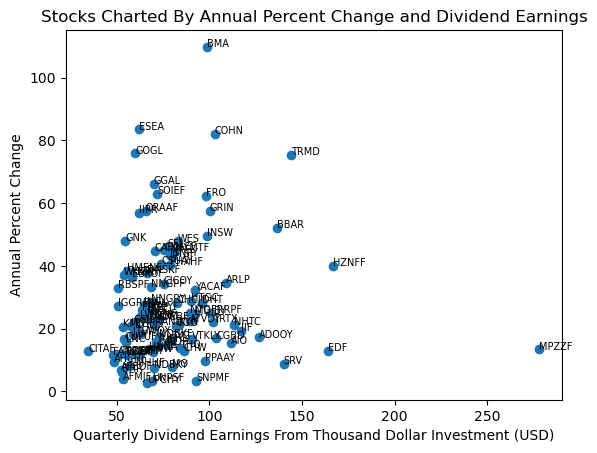

In [280]:
plt.scatter(df["Quarterly_Dividend_Earnings_From_ThousandDollar_Investment(USD)"], df["FiftyTwo_Week_Percent_Change"])
plt.title("Stocks Charted By Annual Percent Change and Dividend Earnings")
plt.xlabel("Quarterly Dividend Earnings From Thousand Dollar Investment (USD)")
plt.ylabel("Annual Percent Change")

for stock in range(len(df)):
    plt.text(df["Quarterly_Dividend_Earnings_From_ThousandDollar_Investment(USD)"][stock], df["FiftyTwo_Week_Percent_Change"][stock], df["Symbol"][stock], fontsize = 7)

plt.show()